# 1. Data distributions
An important consideration before building a machine learning model is to understand what the distribution of your underlying data looks like. A lot of algorithms make assumptions about how your data is distributed or how different features interact with each other. For example almost all models besides tree based models require your features to be on the same scale. Feature engineering can be used to manipulate your data so that it can fit the assumptions of the distribution, or at least fit it as closely as possible.

2. Distribution assumptions
Almost every model besides tree based models assume that your data is normally distributed. Normal distributions follow a bell shape like shown here, the main characteristics of a normal distribution is that 68 percent of the data lies within 1 standard deviation of the mean,95% percent lies within 2 standard deviations from the mean and 99.7% fall within 3 standard deviations from the mean.

3. Observing your data
To understand the shape of your own data you can create histograms of each of the continuous features. To do so, once you have the matplotlib library loaded, along with your DataFrame, run hist() on your data frame followed by calling plt dot show to observe the graph. Here we see the first column has a fairly normal looking distribution, but the second looks quite different, with the majority of the data skewed to the lower values. This is also referred to having a long right tail.

4. Delving deeper with box plots
While histograms can be useful to show the high level distribution of the data, it does not show details such as where the middle chunk of your data sits in an easily readable fashion. For this you can use the box plot. The box plot shows the distribution of the data by calculating where the middle 50% of the data sits, this is also known as the Inter quartile range or IQR (it sits between the 1st and 3rd quartile) and marking it with the box. The whiskers extend to the minimum of 1.5 times the IQR from the edge of the box or the maximum range of the data. Any points outside this are marked as outliers. This can be useful to also see if there are points in your dataset that may be unwanted outliers.

5. Box plots in pandas
To create a box plot in pandas, you can call the boxplot() method on a list of columns you wish to plot.

6. Paring distributions
One final approach to looking at the distribution of data is to examine how different features in your DataFrame interact with each other. This type of chart is called a pairplot and can be useful to see if multiple columns are correlated with each other or whether they have any association at all. To generate a pairplot, first you need to import the seaborn package and then call the pairplot() function on your DataFrame. In this example we can see that the first and last columns are somewhat related.

7. Further details on your distributions
While all these plots are very useful to get an understanding of your data's shape, you will at times want to quickly get summary statistics of your data's distribution. This can be found using the describe() method as seen here on the same dummy dataset we have been using to demonstrate the plots.

8. Let's practice!
Why is this important? Now that you are capable of seeing the underlying structure of the data, in later lessons, you will remove outliers and ensure all features are on comparable scales.

In [1]:
# Import pandas
import pandas as pd
import matplotlib.pyplot as plt
# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv('Combined_DS_v10.csv')

# What does your data look like? (I)
Up until now you have focused on creating new features and dealing with issues in your data. Feature engineering can also be used to make the most out of the data that you already have and use it more effectively when creating machine learning models.
Many algorithms may assume that your data is normally distributed, or at least that all your columns are on the same scale. This will often not be the case, e.g. one feature may be measured in thousands of dollars while another would be number of years. In this exercise, you will create plots to examine the distributions of some numeric columns in the so_survey_df DataFrame, stored in so_numeric_df.

Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.

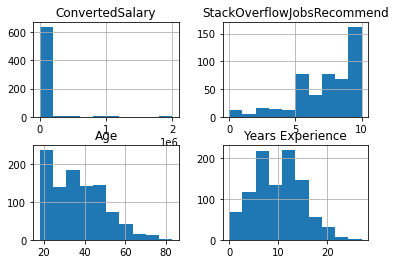

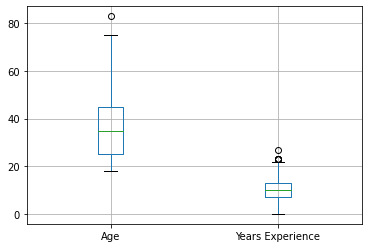

In [2]:
# Create a histogram
so_numeric_df = so_survey_df.select_dtypes(include=['int','float'])
so_numeric_df.hist()
plt.show()
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

Generate box plots of the Age and Years Experience columns in the so_numeric_df DataFrame.

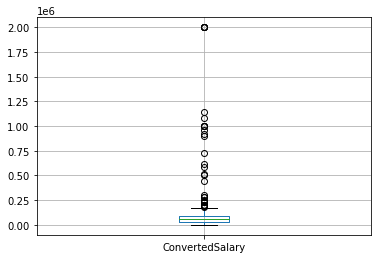

In [3]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

# What does your data look like? (II)
In the previous exercise you looked at the distribution of individual columns. While this is a good start, a more detailed view of how different features interact with each other may be useful as this can impact your decision on what to transform and how.

Instructions 1/2
0 XP
1
2
Import matplotlib's pyplot module as plt.
Import seaborn as sns.
Plot pairwise relationships in the so_numeric_df dataset.
Show the plot.

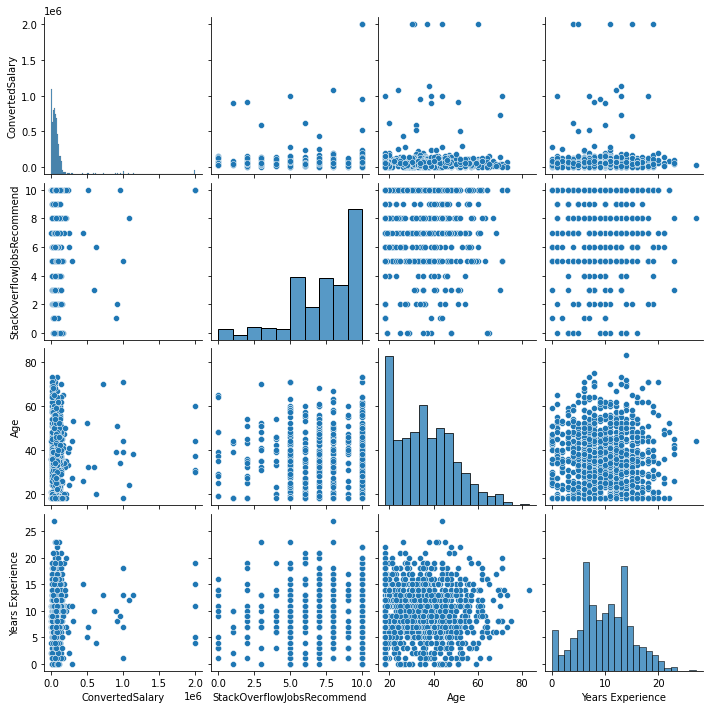

In [4]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

# 1. Scaling and transformations
As mentioned in the last video, most machine learning algorithms require your data to be on the same scale for them to be effective,

2. Scaling data
For example it is difficult to compare salary values (often measured in thousands) with ages as shown here. While this assumption of similar scales is necessary, it is rarely true in real world data. For this reason you need to rescale your data to ensure that it is on the same scale. There are many different approaches to doing this but we will discuss the two most commonly used approaches here, Min-Max scaling (sometimes referred to as normalization), and standardization.

3. Min-Max scaling
Min-Max scaling is when your data is scaled linearly between a minimum and maximum value, often 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest. As it is a linear scaling while the values will change, the distribution will not. Take for example the Age column from the stackoverflow dataset, the raw values lie between 20 and 80, approximately.

4. Min-Max scaling
While here after min-max scaling, although the distribution is the same, the values sit fully between 0 and 1.

5. Min-Max scaling in Python
To implement this on your dataset, you first need to import MinMaxScaler from scikit learn's preprocessing module, scikit learn is the most commonly used machine learning library for python. You then instantiate the MinMaxScaler() and fit it to your data. This tells the scaler how it should scale values when it performs the transformation. Finally, you need to actually transform the data with this new fitted scaler. Note that as this scaler assumes the max value it is created with is your upper bound, new data from outside this range may create unforeseen results.

6. Standardization
The other commonly used scaler is called standardization. As opposed to finding an outer boundary and squeezing everything within it, standardization instead finds the mean of your data and centers your distribution around it, calculating the number of standard deviations away from the mean each point is. These values (the number of standard deviations) are then used as your new values. This centers the data around 0 but technically has no limit to the maximum and minimum values as you can see here.

7. Standardization in Python
You can apply standardization in a similar fashion to how the min-max scaler was implemented. You first import StandardScaler from scikit-learn, instantiate and then fit it on your data. Once fitted you can apply it to your data.

8. Log Transformation
Both normalization and min-max scaling are types of scalers, in other words the data remained in the same shape but was squashed or scaled. A log transformation on the other hand can be used to make highly skewed distributions less skewed. Take for example one of the salary columns from the stack overflow dataset shown here where there is a very long right tail.

9. Log transformation in Python
Although it effects your data quite differently, a log transformation is implemented in Python the same way you have implemented scalers. To use a log transform you first import PowerTransformer from sklearn's preprocessing module, then you fit it to your dataset, and once fitted you can transform your data. Log transformation is a type of power transformation, hence the name.

10. Final Slide
Now it is your turn to apply these three techniques to the data you are familiar with, and see what the transformed data looks like.

# Normalization
As discussed in the video, in normalization you linearly scale the entire column between 0 and 1, with 0 corresponding with the lowest value in the column, and 1 with the largest.
When using scikit-learn (the most commonly used machine learning library in Python) you can use a MinMaxScaler to apply normalization. (It is called this as it scales your values between a minimum and maximum value.)

Instructions
0 XP
Import MinMaxScaler from sklearn's preprocessing module.
Instantiate the MinMaxScaler() as MM_scaler.
Fit the MinMaxScaler on the Age column of so_numeric_df.
Transform the same column with the scaler you just fit.

In [5]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_MM', 'Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


# Standardization
While normalization can be useful for scaling a column between two data points, it is hard to compare two scaled columns if even one of them is overly affected by outliers. One commonly used solution to this is called standardization, where instead of having a strict upper and lower bound, you center the data around its mean, and calculate the number of standard deviations away from mean each data point is.

Instructions
100 XP
Import StandardScaler from sklearn's preprocessing module.
Instantiate the StandardScaler() as SS_scaler.
Fit the StandardScaler on the Age column of so_numeric_df.
Transform the same column with the scaler you just fit.

In [7]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
print(so_numeric_df[['Age_SS', 'Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


# Log transformation
In the previous exercises you scaled the data linearly, which will not affect the data's shape. This works great if your data is normally distributed (or closely normally distributed), an assumption that a lot of machine learning models make. Sometimes you will work with data that closely conforms to normality, e.g the height or weight of a population. On the other hand, many variables in the real world do not follow this pattern e.g, wages or age of a population. In this exercise you will use a log transform on the ConvertedSalary column in the so_numeric_df DataFrame as it has a large amount of its data centered around the lower values, but contains very high values also. These distributions are said to have a long right tail.

Instructions
70 XP
Import PowerTransformer from sklearn's preprocessing module.
Instantiate the PowerTransformer() as pow_trans.
Fit the PowerTransformer on the ConvertedSalary column of so_numeric_df.
Transform the same column with the scaler you just fit.


Show Answer (-70 XP)
Hint
You can use the .fit() and .transform() methods to fit and transform the data.

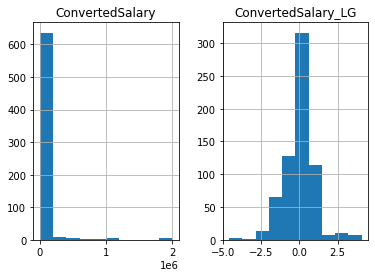

In [8]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

# 1. Removing outliers
You will often find that even after performing these transformations, your data is still very skewed. This can often be caused by outliers existing in your data.

2. What are outliers?
Outliers are data points that exist far away from the majority of your data. This can happen due to several reasons, such as incorrect data recording to genuine rare occurrences. Either way you will often want to remove these values as they can negatively impact your models. An example of the negative effect can be seen here where an outlier is causing almost all of the scaled data to be squashed to the lower bound.

3. Quantile based detection
The first approach we will discuss is to remove a certain percentage of the largest and/or smallest values in your data. For example you could remove the top 5%. This is achieved by finding the 95th quantile (the point below which 95% of your data resides) and removing everything above it. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no real outliers, you will still be removing the top 5% of values from the dataset.

4. Quantiles in Python
To find the 95th quantile, you can call the quantile() method with 0.95 as the argument on the column. You can then create a mask to find which values lie below the 95th quantile and subset the data accordingly.

5. Standard deviation based detection
An alternative, and perhaps more statistically sound method of removing outliers is to instead choose what you consider to be outliers based on the mean and standard deviations of the dataset. For example you may want to eliminate all data greater than 3 standard deviations from the mean as you expect those data points to be outliers. This approach has the benefit of only removing genuinely extreme values, for example if only one value was an outlier, only that value would be effected.

6. Standard deviation detection in Python
To apply this in Python, you first need to find the mean and standard deviation of your column by calling the mean() and std() methods on the column, respectively. You then find upper bound by adding 3 times the standard deviation to the mean and similarly find the lower bound by subtracting 3 times the standard deviation from the mean. Once you have found these bounds, you can apply these bounds as a mask to the DataFrame as shown here. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

7. Let's practice!
Now it's time for you to put what you have learned about outliers into practice.

# Percentage based outlier removal
One way to ensure a small portion of data is not having an overly adverse effect is by removing a certain percentage of the largest and/or smallest values in the column. This can be achieved by finding the relevant quantile and trimming the data using it with a mask. This approach is particularly useful if you are concerned that the highest values in your dataset should be avoided. When using this approach, you must remember that even if there are no outliers, this will still remove the same top N percentage from the dataset.

Instructions
0 XP
Find the 95th quantile of the ConvertedSalary column.
Trim the so_numeric_df DataFrame to retain all rows where ConvertedSalary is less than it's 95th quantile.
Plot the histogram of so_numeric_df[['ConvertedSalary']].
Plot the histogram of trimmed_df[['ConvertedSalary']].

Hint
You can use the quantile() method on a column to find the Nth quantile.

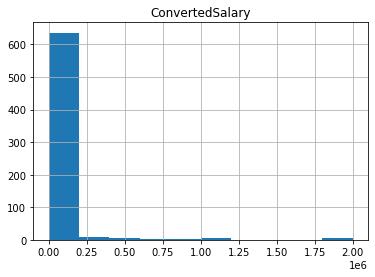

<Figure size 432x288 with 0 Axes>

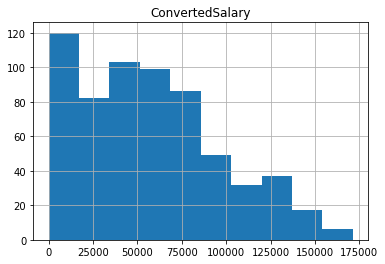

In [9]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

# Statistical outlier removal
While removing the top N% of your data is useful for ensuring that very spurious points are removed, it does have the disadvantage of always removing the same proportion of points, even if the data is correct. A commonly used alternative approach is to remove data that sits further than three standard deviations from the mean. You can implement this by first calculating the mean and standard deviation of the relevant column to find upper and lower bounds, and applying these bounds as a mask to the DataFrame. This method ensures that only data that is genuinely different from the rest is removed, and will remove fewer points if the data is close together.

Instructions
0 XP
Calculate the standard deviation and mean of the ConvertedSalary column of so_numeric_df.
Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.
Trim the so_numeric_df DataFrame to retain all rows where ConvertedSalary is within the lower and upper bounds.

Hint
You can use the .std() and .mean() methods to calculate the standard deviation and mean.

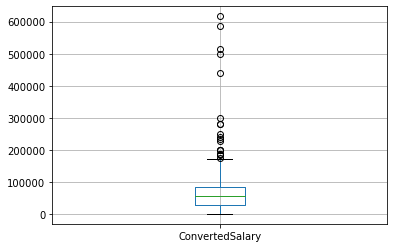

In [10]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) \
                           & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

# 1. Scaling and transforming new data
One of the most important aspects of machine learning is the actual application of any model you create on a new dataset. For example if you built a model based on historical data, ultimately you will want to apply this model on new data to make predictions.

2. Reuse training scalers
How you go about doing this depends on what transformations you make to the dataset before you fit the model. For example, if you applied the StandardScaler() to your data before fitting the model, you need to make sure you transform the test data using the same scalar before making predictions. Please do note that the scaler is fitted only on the training data. That is, you fit and transform the training data, but only transform the test data.

3. Training transformations for reuse
Similarly, if you intend to remove outliers from your test set, you should use the thresholds found on your train set to do so. If you were to use the mean and standard deviation of the test set, it could negatively impact your predictions. Note that it is only in very rare cases that you would want to remove outliers from your test set.

4. Why only use training data?
So why did we not refit the scaler on the test data or use thresholds from the test data? To avoid data leakage. In real life, you won't have access to the test data, that is, when you have deployed your model in production, you won't have access to future data, so you can't rely on it to make predictions and assess model performance.

5. Avoid data leakage!
Thus, you should always make sure you calibrate your preprocessing steps only on your training data or else you will overestimate the accuracy of your models.

# Train and testing transformations (I)
So far you have created scalers based on a column, and then applied the scaler to the same data that it was trained on. When creating machine learning models you will generally build your models on historic data (train set) and apply your model to new unseen data (test set). In these cases you will need to ensure that the same scaling is being applied to both the training and test data.
To do this in practice you train the scaler on the train set, and keep the trained scaler to apply it to the test set. You should never retrain a scaler on the test set.

For this exercise and the next, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

Instructions
0 XP
Instantiate the StandardScaler() as SS_scaler.
Fit the StandardScaler on the Age column.
Transform the Age column in the test set (so_test_numeric).

Hint
Remember that you should always fit the scaler on the train data.

In [13]:
so_numeric_df

,ConvertedSalary,StackOverflowJobsRecommend,Age,Years Experience,Age_MM,Age_SS,ConvertedSalary_LG
0,NaN,NaN,21,13,0.046154,-1.132431,NaN
1,70841.0,7.0,38,9,0.307692,0.150734,0.312939
2,NaN,8.0,45,11,0.415385,0.679096,NaN
3,21426.0,NaN,46,12,0.430769,0.754576,-0.652182
4,41671.0,8.0,39,7,0.323077,0.226214,-0.135589
...,...,...,...,...,...,...,...
994,NaN,NaN,45,10,0.415385,0.679096,NaN
995,58746.0,8.0,27,16,0.138462,-0.679549,0.150821
996,55000.0,NaN,54,16,0.553846,1.358419,0.094781
997,NaN,NaN,23,9,0.076923,-0.981470,NaN


In [15]:
so_train_numeric = so_numeric_df.iloc[0:700 ,[0,2,3]]
so_test_numeric = so_numeric_df.iloc[700:,[0,2,3] ]
so_train_numeric

,ConvertedSalary,Age,Years Experience
0,NaN,21,13
1,70841.0,38,9
2,NaN,45,11
3,21426.0,46,12
4,41671.0,39,7
...,...,...,...
695,NaN,31,14
696,15600.0,18,18
697,29724.0,44,27
698,41276.0,25,8


In [16]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
print(so_test_numeric[['Age', 'Age_ss']].head())

     Age    Age_ss
700   35 -0.069265
701   18 -1.343218
702   47  0.829997
703   57  1.579381
704   41  0.380366


# Train and testing transformations (II)
Similar to applying the same scaler to both your training and test sets, if you have removed outliers from the train set, you probably want to do the same on the test set as well. Once again you should ensure that you use the thresholds calculated only from the train set to remove outliers from the test set.

Similar to the last exercise, we split the so_numeric_df DataFrame into train (so_train_numeric) and test (so_test_numeric) sets.

Instructions
0 XP
Calculate the standard deviation and mean of the ConvertedSalary column.
Calculate the upper and lower bounds as three standard deviations away from the mean in both the directions.
Trim the so_test_numeric DataFrame to retain all rows where ConvertedSalary is within the lower and upper bounds.

Hint
You can use the .std() and .mean() methods to calculate the standard deviation and mean.
Remember to use the thresholds calculated from the train set to subset the test set.

In [17]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

In [18]:
trimmed_df

,ConvertedSalary,Age,Years Experience,Age_ss
700,36716.0,35,13,-0.069265
701,200000.0,18,20,-1.343218
703,10476.0,57,19,1.579381
707,42672.0,29,9,-0.518895
708,23614.0,46,15,0.755058
...,...,...,...,...
988,50448.0,18,4,-1.343218
991,55562.0,34,1,-0.144203
993,30000.0,28,5,-0.593834
995,58746.0,27,16,-0.668772
